<a href="https://colab.research.google.com/github/simulate111/Data-Science_2024/blob/main/MP_3%20(Isac%20Schauman).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving artists.csv to artists (1).csv
Saving institutions.csv to institutions.csv
Saving relationships.csv to relationships.csv
Saving schools.csv to schools.csv


Top 5 influential movements: [('Baroque', 39), ('Romanticism', 31), ('Expressionism', 28), ('Realism', 27), ('Impressionism', 24)]
Top 5 influential artists: [('/en/pablo-picasso', 27), ('/en/rembrandt', 23), ('/en/paul-cezanne', 23), ('/en/caravaggio', 22), ('/en/titian', 19)]
Top 5 influential institutions: [('/en/artists-by-art-institution/cole-des-beaux-arts', 10), ('/en/artists-by-art-institution/royal-academy-of', 9), ('/en/artists-by-art-institution/guild-of-saint-luke', 6), ('/en/artists-by-art-institution/self-taught', 6), ('/en/artists-by-art-institution/acad-mie-des-beaux', 5)]
Top nationalities by artist count and their proportions:
American: 520 artists (17.36% of total)
French: 402 artists (13.42% of total)
Italian: 269 artists (8.98% of total)
British: 249 artists (8.31% of total)
German: 160 artists (5.34% of total)
Number of nodes (artists): 811
Number of edges (influence connections): 1750
Network density: 0.0027
Average out-degree: 2.16


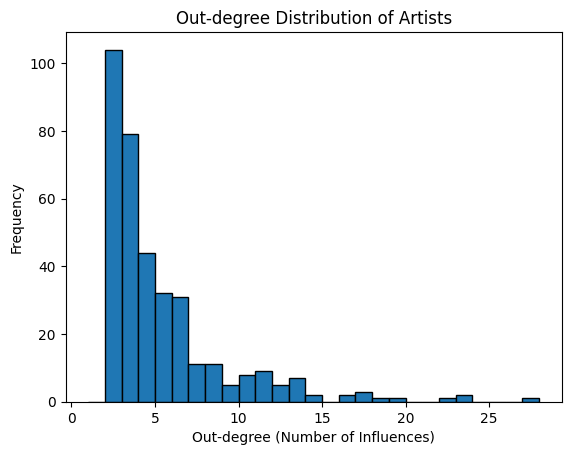

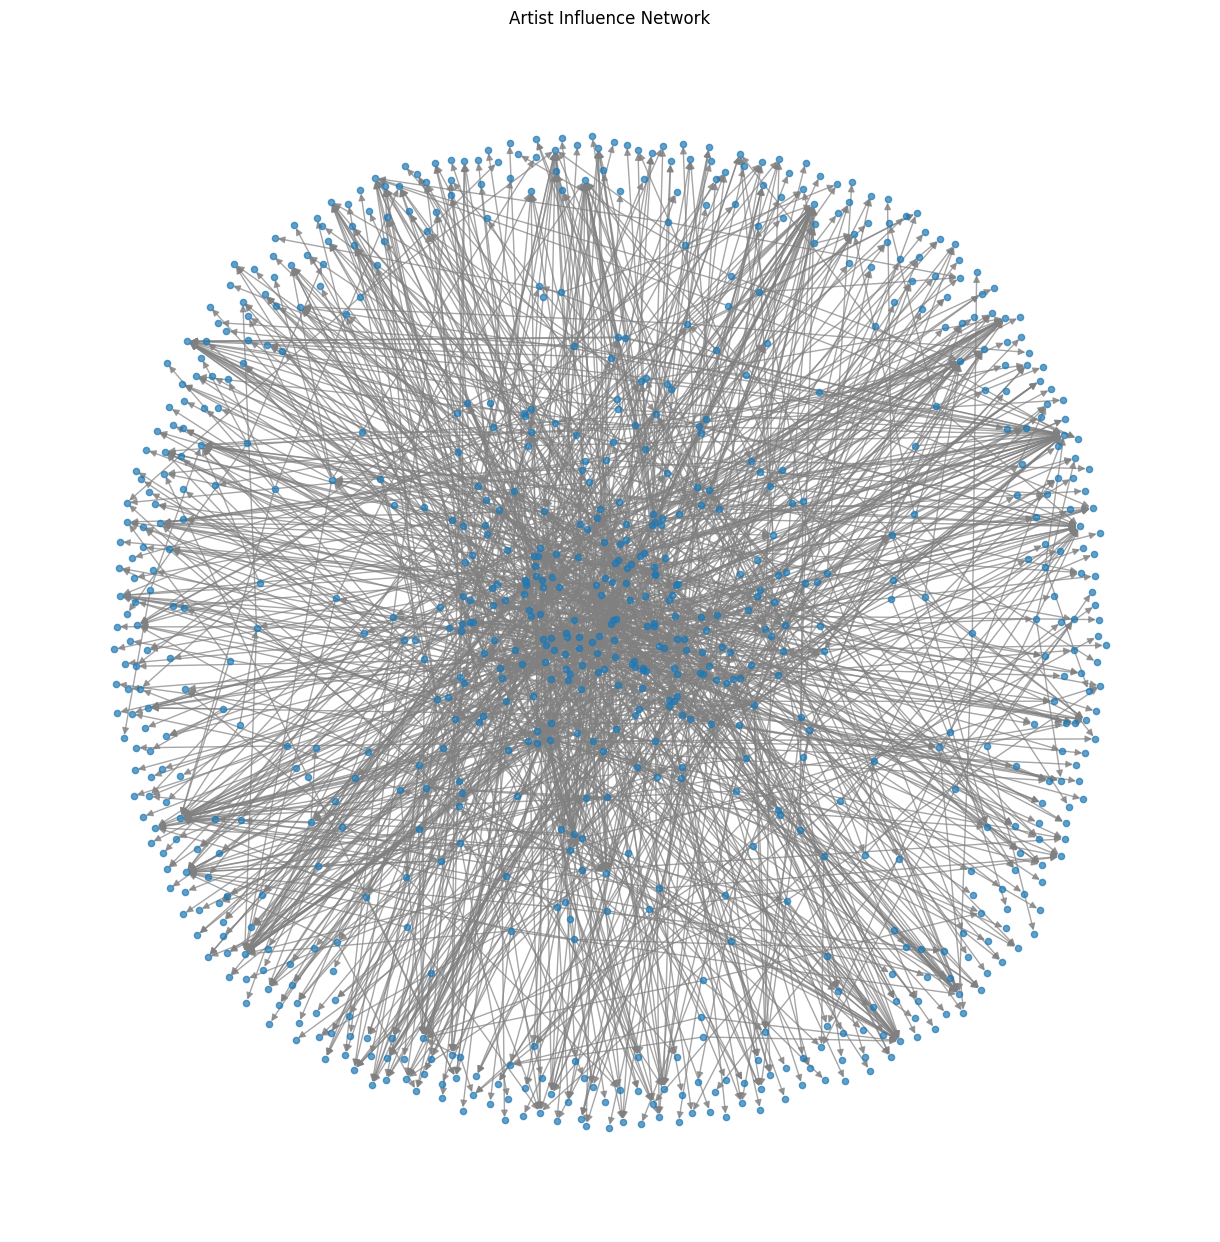

In [5]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter


# Step 1: Load the Data
artists_df = pd.read_csv('artists.csv')
relationships_df = pd.read_csv('relationships.csv')
institutions_df = pd.read_csv('institutions.csv')
schools_df = pd.read_csv('schools.csv')


# Filter for artists with at least one "influenced_on" connection
influential_relationships_df = relationships_df[relationships_df['influenced_on'].notna()]

G = nx.DiGraph()

# Add nodes and edges based on influenced_on connections and movements
for _, row in influential_relationships_df.iterrows():
    artist = row['artistUrl']
    influences = row['influenced_on'].split(',') if pd.notna(row['influenced_on']) else []
    movements = row['movements'].split(',') if pd.notna(row['movements']) else []

    G.add_node(artist, type='artist')

    # Add edges from the artist to influenced artists
    for influenced_artist in influences:
        influenced_artist = influenced_artist.strip()

        if not G.has_node(influenced_artist):
            G.add_node(influenced_artist, type='artist')
        G.add_edge(artist, influenced_artist)

    # Add movement nodes and edges from artist to movements
    for movement in movements:
        movement = movement.strip()
        G.add_node(movement, type='movement')
        G.add_edge(artist, movement)


movement_degrees = Counter({node: G.in_degree(node) for node, data in G.nodes(data=True) if data['type'] == 'movement'})

top_influential_movements = movement_degrees.most_common(5)
print("Top 5 influential movements:", top_influential_movements)

top_influential_artists = sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 influential artists:", top_influential_artists)


influential_artists_df = relationships_df[relationships_df['influenced_on'].notna()]

all_institutions = influential_artists_df['institution'].dropna()

# Count occurrences of each institution
institution_counts = Counter(all_institutions)

# Get the top 5 most influential institutions
top_influential_institutions = institution_counts.most_common(5)
print("Top 5 influential institutions:", top_influential_institutions)

# Count occurrences of each nationality
nationality_counts = Counter(artists_df['nation'].dropna())

# Calculate the total number of artists for reference
total_artists = len(artists_df)

top_nationalities = [(nation, count, f"{(count / total_artists) * 100:.2f}%")
                     for nation, count in nationality_counts.most_common(5)]

print("Top nationalities by artist count and their proportions:")
for nation, count, proportion in top_nationalities:
    print(f"{nation}: {count} artists ({proportion} of total)")



# Output network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_out_degree = sum(dict(G.out_degree()).values()) / num_nodes

print(f"Number of nodes (artists): {num_nodes}")
print(f"Number of edges (influence connections): {num_edges}")
print(f"Network density: {density:.4f}")
print(f"Average out-degree: {avg_out_degree:.2f}")

# Degree distribution for visualization
out_degrees = [degree for node, degree in G.out_degree()]
plt.hist(out_degrees, bins=range(1, max(out_degrees)+2), edgecolor='black')
plt.xlabel("Out-degree (Number of Influences)")
plt.ylabel("Frequency")
plt.title("Out-degree Distribution of Artists")
plt.show()

# Visualize the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)  # Spring layout for a clear visualization
nx.draw(G, pos, with_labels=False, node_size=20, edge_color="gray", alpha=0.7)
plt.title("Artist Influence Network")
plt.show()
